In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [15]:
# concatenation of both files 
# df_train = pd.read_csv('extracted_features_hog_95.csv',header=None)

# df_train = df_train.astype(str)


# # Convert all columns to string type
# df_train[0]=df_train[0].str.split(',',expand=True)
# # print(df)


# df_test = pd.read_csv('extracted_features_test_hog_95.csv',header=None)


# df_test = df_test.astype(str)

# # Convert all columns to string type
# df_test[0]=df_test[0].str.split(',',expand=True)

# # print(df_test)


# df=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

# print(df.shape)




In [2]:
df = pd.read_csv('hog_95(complete).csv',header=None)
print(df.shape)

# df = df.astype(str)

(13234, 3249)


In [3]:
# Initialize lists to store x and y values for scatter plot
n_c = df[0].value_counts()

# # Calculate the maximum number of images a person has
# max_images = n_c.max()

# # Initialize lists to store x and y values for scatter plot
# x_values = []
# y_values = []

# # Iterate with a step size of 50 up to the maximum number of images a person has
# for i in range(1, max_images + 1, 5):
#     # Count how many people have images in the current range
#     count = ((n_c >= i) & (n_c < i + 50)).sum()
#     x_values.append(i)
#     y_values.append(count)

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(x_values, y_values, color='skyblue', alpha=0.6)
# plt.title('Number of People vs. Number of Images')
# plt.xlabel('Number of Images')
# plt.ylabel('Number of People')
# plt.grid(True)
# plt.show()

In [4]:
# mask_20=df[0].isin(n_c[n_c>20].index)
# df_20=df[mask_20]
# print(df_20.shape)

In [5]:
# mask_30=df[0].isin(n_c[n_c>30].index)
# df_30=df[mask_30]
# print(df_30.shape)

In [4]:
mask_50=df[0].isin(n_c[n_c>50].index)
df_50=df[mask_50]
print(df_50.shape)


(1560, 3249)


In [5]:
filtered_name_counts=n_c[n_c>50]
sorted_filtered_names_counts=filtered_name_counts.sort_values(ascending=False)
print(sorted_filtered_names_counts)

0
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
Ariel_Sharon          77
Hugo_Chavez           71
Junichiro_Koizumi     60
Jean_Chretien         55
John_Ashcroft         53
Jacques_Chirac        52
Serena_Williams       52
Name: count, dtype: int64


In [6]:
X=df_50.iloc[:, 1:]
y=df_50.iloc[:,0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train.shape

(1248, 3248)

In [10]:
y_train[:10]

7220           Hugo_Chavez
10438        George_W_Bush
13180      Donald_Rumsfeld
6605          Colin_Powell
10861           Tony_Blair
7326          Colin_Powell
12138           Tony_Blair
4728          Colin_Powell
5283     Junichiro_Koizumi
10296         Colin_Powell
Name: 0, dtype: object

In [29]:
scaler=StandardScaler()
X_train_arr=X_train.values
X_train_scaled=scaler.fit_transform(X_train_arr)


In [12]:
print(X_train.shape)

(1248, 3248)


In [27]:
# X_train_arr.shape

In [28]:
def model(X_train, i, featr, param_type=None):
    
    # Splitting X_train into training and validation subsets
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    if param_type == 'max_depth':
        clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    elif param_type == 'min_samples_split':
        clf = DecisionTreeClassifier(min_samples_split=i, random_state=42)
    elif param_type == 'min_samples_leaf':
        clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    elif param_type == 'max_leaf_nodes':
        clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42)
    else:
        clf = DecisionTreeClassifier(max_depth=None, random_state=42)
    
    clf.fit(X_train_sub, y_train_sub)

    # Predict on the validation data
    y_val_pred = clf.predict(X_val)

    # Compute accuracy on validation data
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Accuracy using feature of {featr}:", accuracy)

    tree_depth = clf.tree_.max_depth

    print("Depth of the decision tree:", tree_depth)


    # joblib.dump(clf,f'{featr}.joblib')  ## not saving the model ##

In [29]:
# find the max_depth
model(X_train_scaled,None,'test')

Accuracy using feature of test: 0.352
Depth of the decision tree: 18


In [30]:
# for max_depth idea
for i in range(1,20,2):
    model(X_train_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.332
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.368
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.404
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.444
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.388
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.344
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.384
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.34
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.344
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.352
Depth of the decision tree: 18


In [31]:
for i in range(2,1249,50):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.332
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.412
Depth of the decision tree: 10
Accuracy using feature of max_leaf_node 102: 0.372
Depth of the decision tree: 16
Accuracy using feature of max_leaf_node 152: 0.348
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.344
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 252: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 302: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 352: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 402: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 452: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 502: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 552: 0.348
Depth of the decision tree: 18
Accuracy using featu

In [32]:
# for min_sample_split
for i in range(2,1249,50):
    model(X_train_scaled,i,f'min_sample_split {i}','min_samples_split')

Accuracy using feature of min_sample_split 2: 0.352
Depth of the decision tree: 18
Accuracy using feature of min_sample_split 52: 0.408
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 102: 0.4
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 152: 0.36
Depth of the decision tree: 17
Accuracy using feature of min_sample_split 202: 0.364
Depth of the decision tree: 10
Accuracy using feature of min_sample_split 252: 0.352
Depth of the decision tree: 5
Accuracy using feature of min_sample_split 302: 0.356
Depth of the decision tree: 4
Accuracy using feature of min_sample_split 352: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 402: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 452: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 502: 0.332
Depth of the decision tree: 2
Accuracy using feature of min_sample_split 552: 0.332
Depth of the decision t

In [33]:
# min_samples_leaf
for i in range(1,1249,50):
    model(X_train_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.352
Depth of the decision tree: 18
Accuracy using feature of min_samples_leaf51: 0.372
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf101: 0.34
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf151: 0.376
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.352
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.332
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf501: 0.312
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf551: 0.312
Depth of the decision tree: 0
Accurac

In [34]:
# grid decided based on the basis of around values of best accuracies calculated in the domain of possible values now going around that values to find the best hyperparameter
def tuning_model(X_train,featr,param_grid):
    clf = DecisionTreeClassifier(random_state=42)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    cv_results = grid_search.cv_results_
    

    print("Grid Search Results: ")


    for i, (rank,mean_score, params) in enumerate(zip(cv_results['rank_test_score'],cv_results["mean_test_score"], cv_results["params"]), start=1):
        print(f"{i}). Rank_score: {rank}, Mean accuracy: {mean_score:.3f}, Parameters: {params}")
    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Print the best score
    print("Best Score:", grid_search.best_score_)

    # Save the best trained model using joblib
    best_clf = grid_search.best_estimator_

    
    joblib.dump(best_clf, f"tuned_dt_{featr}.joblib")

    return cv_results,best_clf

In [35]:
param_grid = {
        'max_depth': [6,7,8],
        'max_leaf_nodes':[40,50,70,90],
        'min_samples_split': [40,50,60],
        'min_samples_leaf': [1,10,40,60],
        
    }


In [36]:
cv_results,best_clf=tuning_model(X_train_scaled,'conc_50_gd',param_grid)

Grid Search Results: 
1). Rank_score: 62, Mean accuracy: 0.453, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 40}
2). Rank_score: 50, Mean accuracy: 0.455, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 50}
3). Rank_score: 58, Mean accuracy: 0.454, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 1, 'min_samples_split': 60}
4). Rank_score: 38, Mean accuracy: 0.456, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'min_samples_split': 40}
5). Rank_score: 46, Mean accuracy: 0.455, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'min_samples_split': 50}
6). Rank_score: 33, Mean accuracy: 0.458, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'min_samples_split': 60}
7). Rank_score: 73, Mean accuracy: 0.442, Parameters: {'max_depth': 6, 'max_leaf_nodes': 40, 'min_samples_leaf': 40, 'min_samples

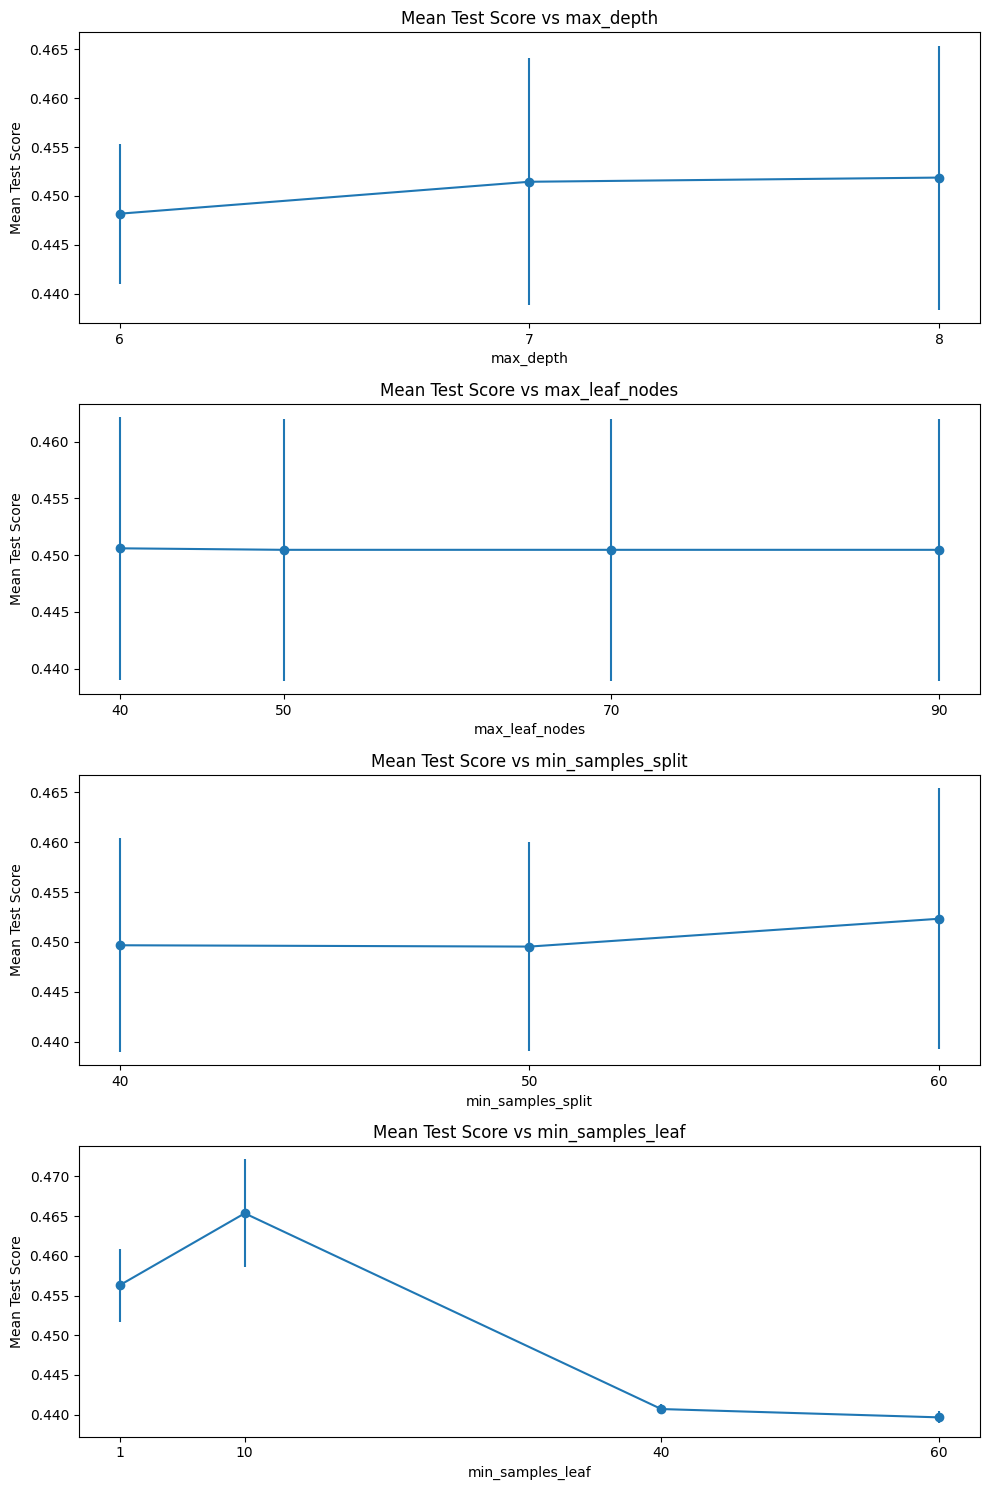

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


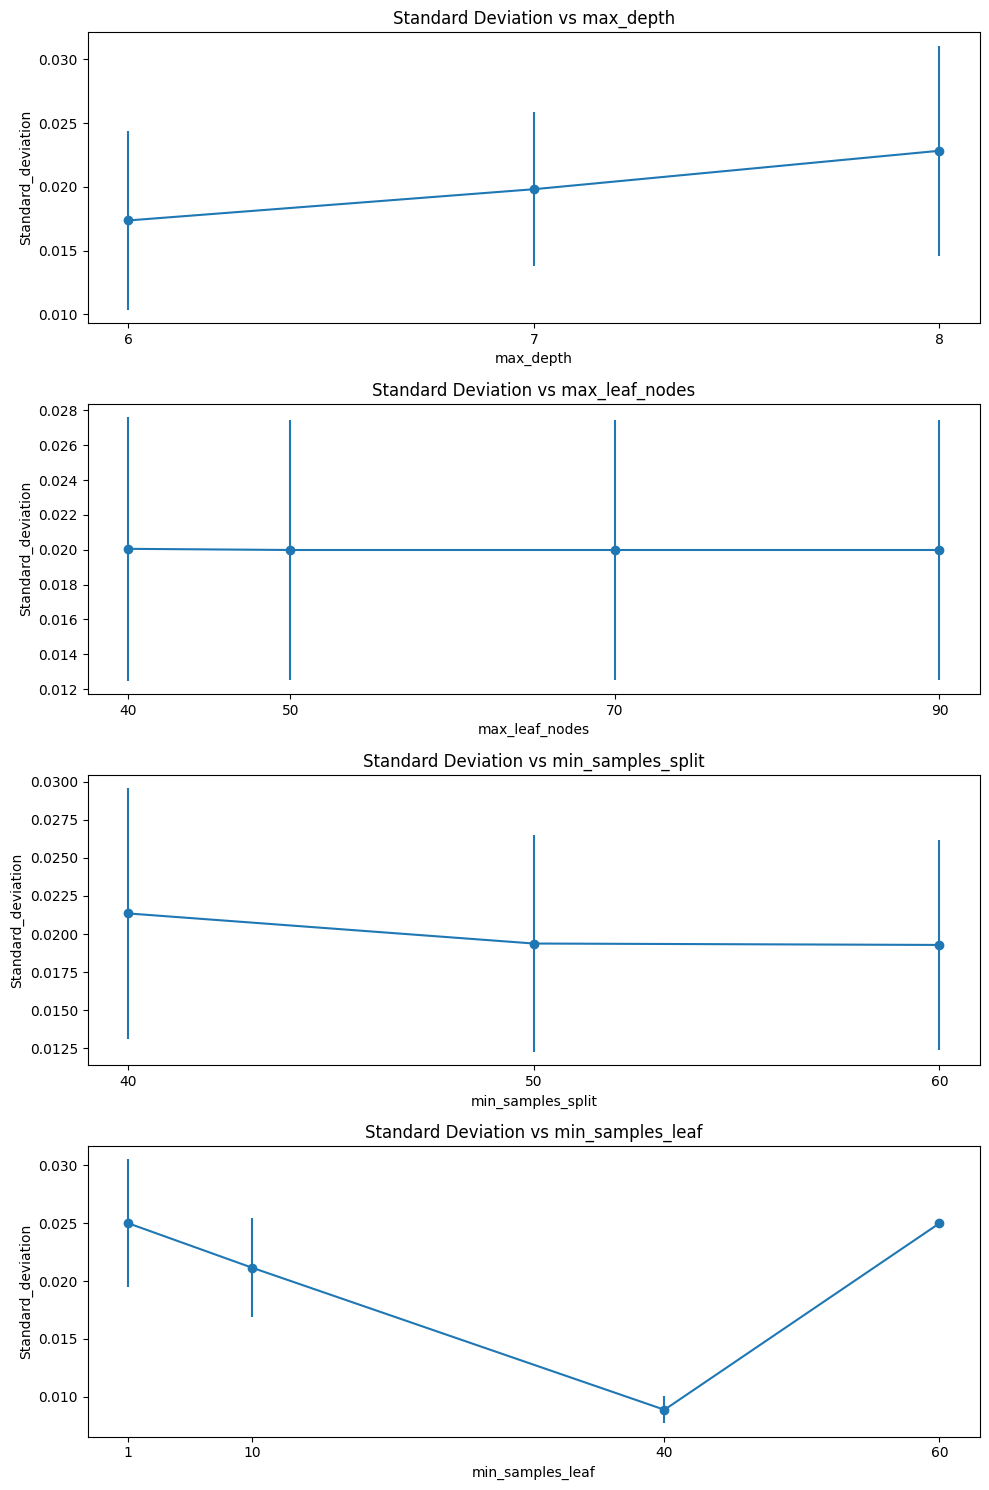

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [30]:
X_test_arr=X_test.values

X_test_scaled = scaler.transform(X_test_arr)
# y_pred = best_clf.predict(X_test_scaled)

# # Compute accuracy
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test: 0.3974358974358974
Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.70      0.50      0.58        14
     Colin_Powell       0.26      0.43      0.32        47
  Donald_Rumsfeld       0.50      0.16      0.24        31
    George_W_Bush       0.58      0.70      0.63        92
Gerhard_Schroeder       0.25      0.33      0.29        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.57      0.31      0.40        13
    Jean_Chretien       0.13      0.27      0.18        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.38      0.29      0.33        17
  Serena_Williams       0.67      0.25      0.36         8
       Tony_Blair       0.30      0.28      0.29        25

         accuracy                           0.40       312
        macro avg       0.36      0.29      0.30       312
     weighted avg       0.40      0.40      0.38   

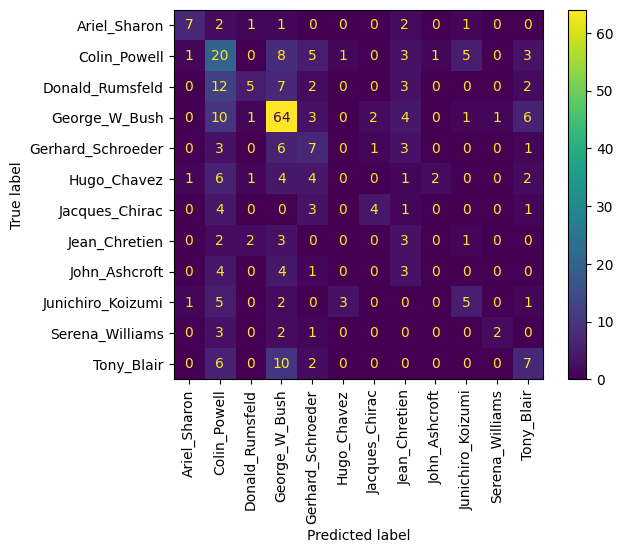

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



model = joblib.load('saved_models_dt/min_img/50/h_tuned/tuned_dt_conc_50_gd.joblib')

y_pred = model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on X_test:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



# Create confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(
    model, X_test_scaled, y_test, xticks_rotation="vertical"

)





In [32]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Weighted Precision: 0.3979
Weighted Recall: 0.3974
Weighted F1-score: 0.3779


In [40]:
# for plotting graphs for correct predictions

# folder='saved_models_dt'
# loaded_clf=joblib.load(f'{folder}/min_img/20/conc_20_d10_ms4.joblib')

# y_pred_loaded=loaded_clf.predict(X_test)  #be careful here which model's X_test is there

# indices=np.where(y_pred_loaded==y_test)[0]
# y_pred_correct=y_pred_loaded[indices]


# df_correct = pd.DataFrame({
#     'y_correct': y_pred_correct,
    
# })


# unique_classes_count = df_correct['y_correct'].value_counts()

# plt.figure(figsize=(10, 6))
# unique_classes_count.plot(kind='bar', color='skyblue')
# plt.xlabel('Unique Classes')
# plt.ylabel('Count')
# plt.title('Count of Unique Classes Predicted Correctly')
# plt.xticks(rotation=45)
# plt.grid(axis='y')

# plt.show()

In [20]:
X_hog_train=X_train.iloc[:,1:945]
X_train_hog_arr=X_hog_train.values
X_train_hog_scaled = scaler.fit_transform(X_train_hog_arr)

In [42]:
# Getting the max_depth
model(X_train_hog_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.276
Depth of the decision tree: 20


In [43]:
# Got maximum depth of the tree as 20
for i in range(1,20,2):
    model(X_train_hog_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.36
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.352
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.312
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.236
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.28
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.24
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.276
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.28
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.272
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.272
Depth of the decision tree: 19


In [44]:
for i in range(2,1249,50):
        model(X_train_hog_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.36
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.288
Depth of the decision tree: 9
Accuracy using feature of max_leaf_node 102: 0.292
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 152: 0.252
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 202: 0.252
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 252: 0.24
Depth of the decision tree: 19
Accuracy using feature of max_leaf_node 302: 0.236
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 352: 0.236
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 402: 0.236
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 452: 0.236
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 502: 0.236
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 552: 0.236
Depth of the decision tree: 20
Accuracy using feature 

In [45]:
# for min_sample_split
for i in range(2,1249,50):
    model(X_train_hog_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.276
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 52: 0.3
Depth of the decision tree: 11
Accuracy using feature of min_samples_split 102: 0.34
Depth of the decision tree: 8
Accuracy using feature of min_samples_split 152: 0.348
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 202: 0.348
Depth of the decision tree: 5
Accuracy using feature of min_samples_split 252: 0.344
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 302: 0.352
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 352: 0.36
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 402: 0.36
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 452: 0.36
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 502: 0.36
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 552: 0.36
Depth of the decisi

In [46]:
# min_samples_leaf
for i in range(1,1249,50):
    model(X_train_hog_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.276
Depth of the decision tree: 20
Accuracy using feature of min_samples_leaf51: 0.36
Depth of the decision tree: 7
Accuracy using feature of min_samples_leaf101: 0.348
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf151: 0.36
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.36
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf251: 0.36
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.36
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf351: 0.352
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.312
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.312
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf501: 0.312
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf551: 0.312
Depth of the decision tree: 0
Accuracy us

In [47]:
# on analysing the best range I found the following param grid:
param_grid_hog={
    'max_depth': [2,4,6],
    'max_leaf_nodes':[50,60,70,90],
    'min_samples_split': [ 400,420,450,480,520,600,620],
    'min_samples_leaf': [50,60,80,120,150]
}



In [48]:
cv_results_hog,best_clf_hog=tuning_model(X_train_hog_scaled,'hog_50_gd',param_grid_hog)

Grid Search Results: 
1). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 400}
2). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 420}
3). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 450}
4). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 480}
5). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 520}
6). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'min_samples_split': 600}
7). Rank_score: 85, Mean accuracy: 0.369, Parameters: {'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_leaf': 50, 'mi

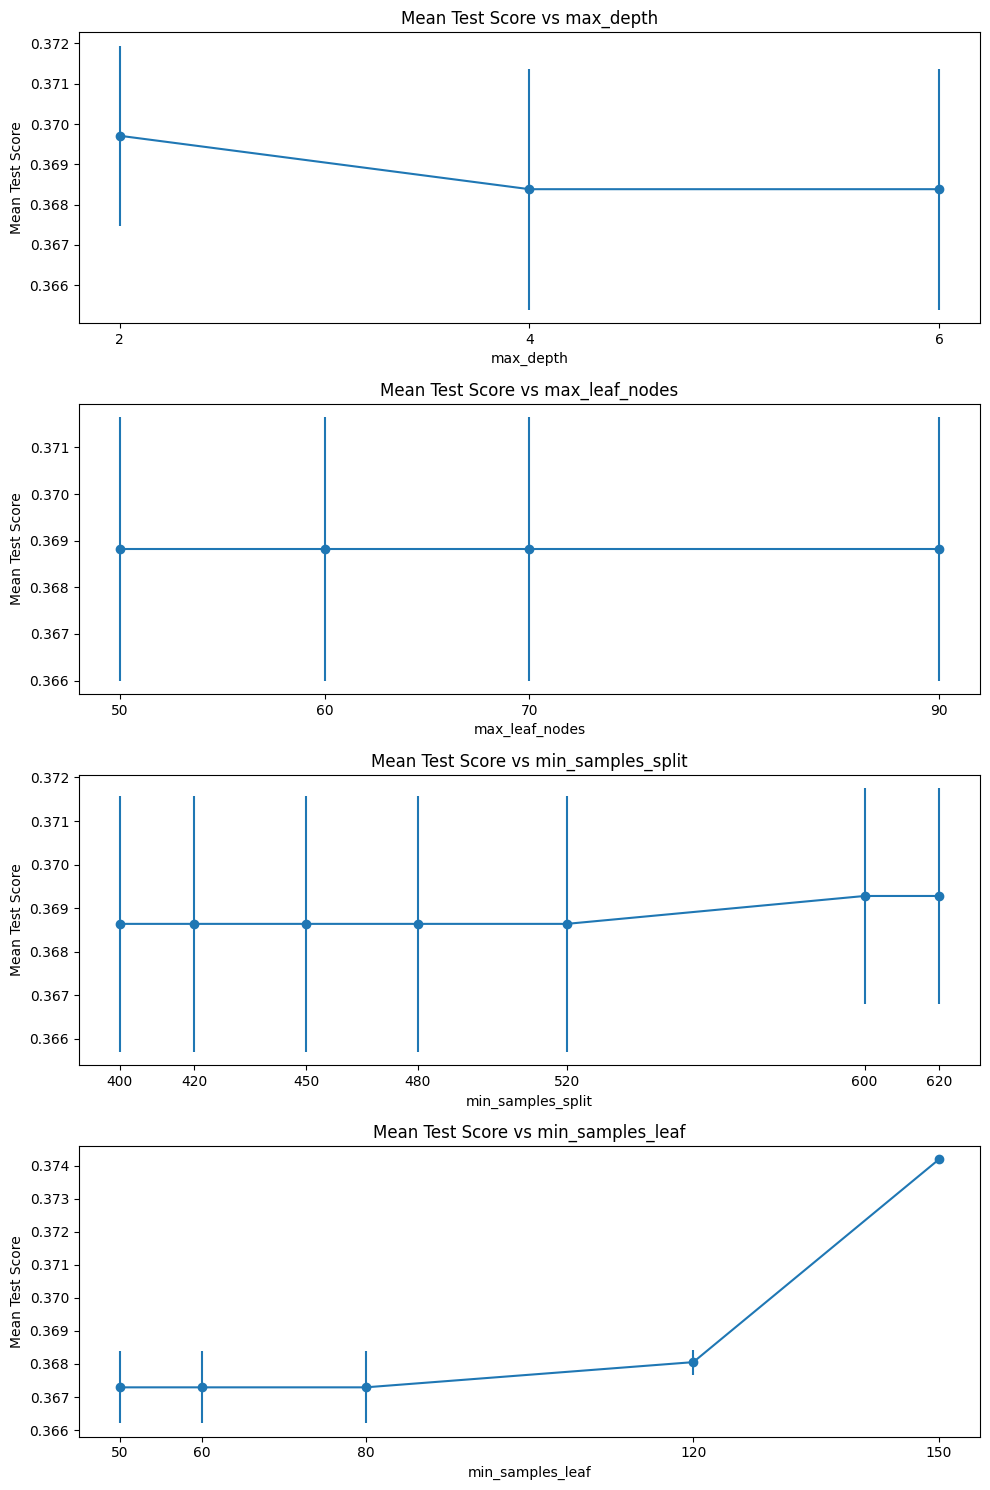

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_hog['mean_test_score']
std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


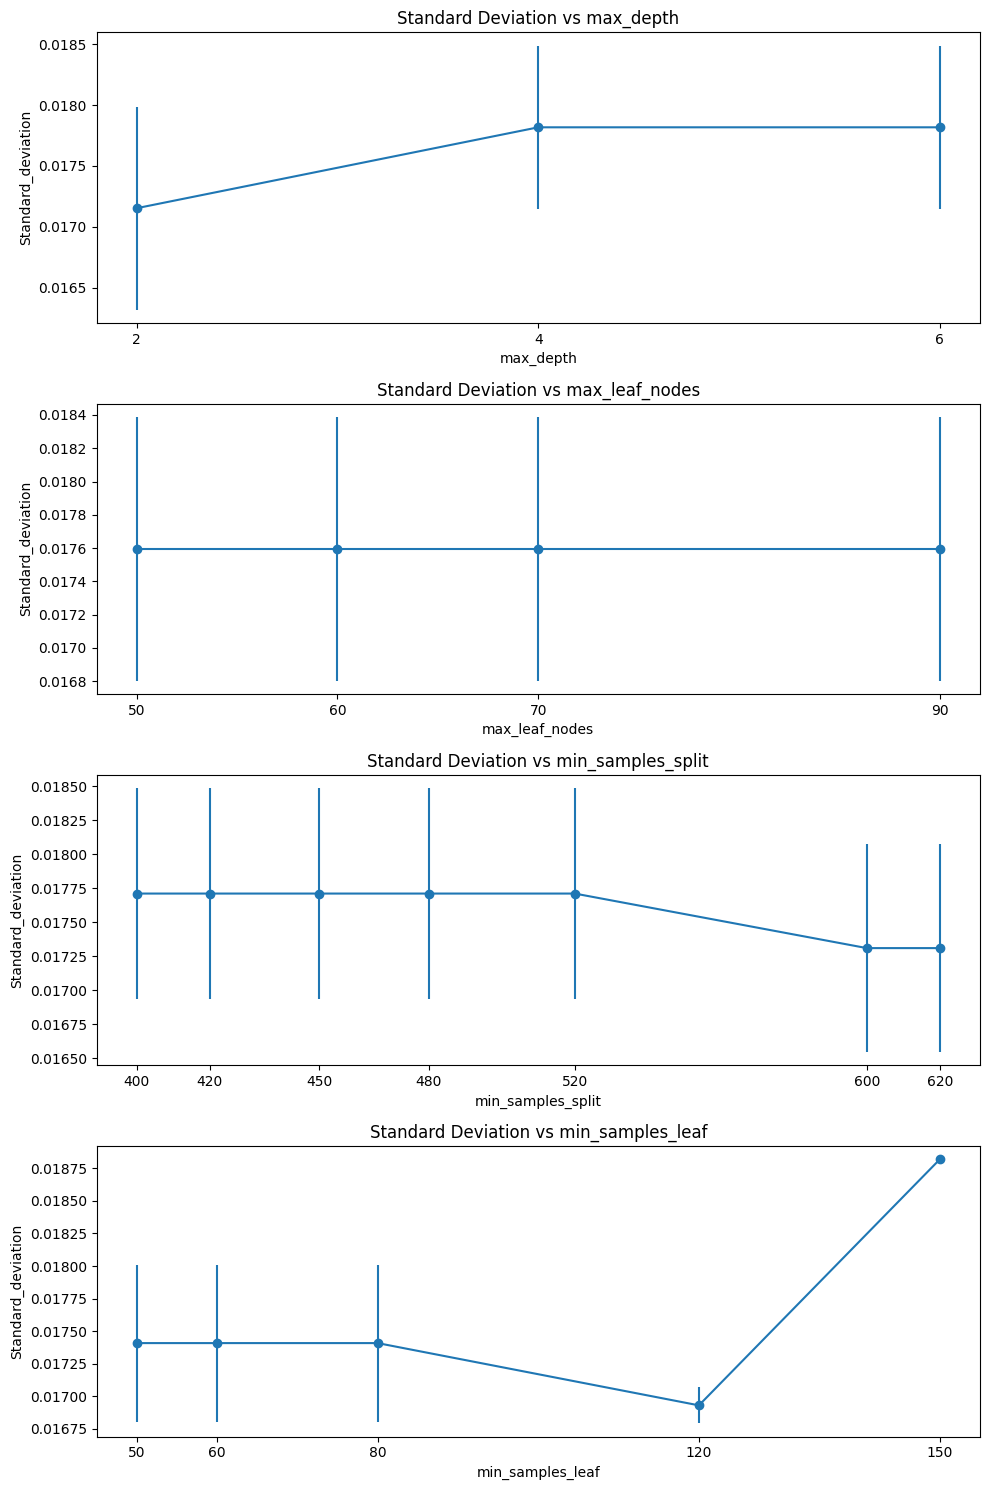

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_hog['std_test_score']
params = cv_results_hog['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [24]:
# Testing on the test data:

X_hog_test=X_test.iloc[:,1:945]
X_test_hog_arr=X_hog_test.values
X_test_hog_scaled = scaler.transform(X_test_hog_arr)

# y_pred_hog = best_clf_hog.predict(X_test_hog_scaled)

# # # Compute accuracy
# accuracy = accuracy_score(y_test, y_pred_hog)

# print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.32371794871794873
Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.00      0.00      0.00        14
     Colin_Powell       0.26      0.53      0.35        47
  Donald_Rumsfeld       0.00      0.00      0.00        31
    George_W_Bush       0.35      0.83      0.49        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.00      0.00      0.00        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.00      0.00      0.00        17
  Serena_Williams       0.00      0.00      0.00         8
       Tony_Blair       0.00      0.00      0.00        25

         accuracy                           0.32       312
        macro avg       0.05      0.11      0.07       312
     weighted avg       0.14      0.32      0.

/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

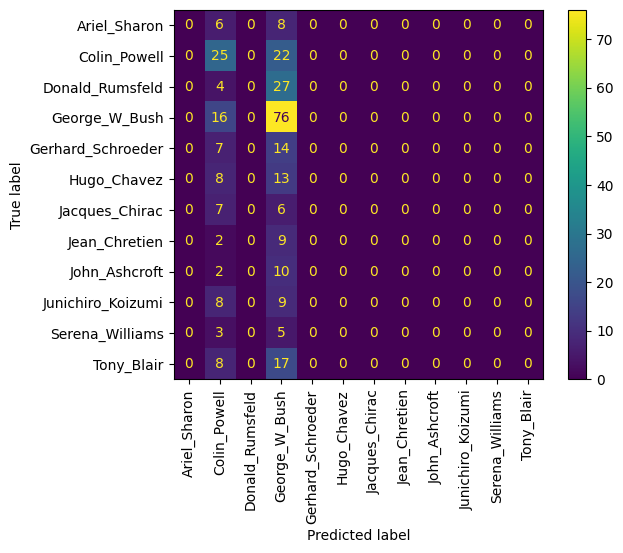

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



model_hog = joblib.load('saved_models_dt/min_img/50/h_tuned/tuned_dt_hog_50_gd.joblib')

y_pred_hog = model_hog.predict(X_test_hog_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_hog)

print(f"Accuracy on X_test_hog:", accuracy)

report = classification_report(y_test, y_pred_hog)
print("Classification Report:")
print(report)



# Create confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(
    model_hog, X_test_hog_scaled, y_test, xticks_rotation="vertical"
)





In [26]:
precision = precision_score(y_test, y_pred_hog, average='weighted')
recall = recall_score(y_test, y_pred_hog, average='weighted')
f1 = f1_score(y_test, y_pred_hog, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Weighted Precision: 0.1430
Weighted Recall: 0.3237
Weighted F1-score: 0.1982


/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>CNN


In [15]:
X_cnn_train=X_train.iloc[:,945:2993]
X_train_cnn_arr=X_cnn_train.values
X_train_cnn_scaled = scaler.fit_transform(X_train_cnn_arr)




In [53]:
# finding the max_depth
model(X_train_cnn_scaled,None,'maxdepth')

Accuracy using feature of maxdepth: 0.4
Depth of the decision tree: 18


In [54]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,18,2):
    model(X_train_cnn_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.332
Depth of the decision tree: 1
Accuracy using feature of max_depth_3: 0.352
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.404
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.472
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.412
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.404
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.396
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.396
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.396
Depth of the decision tree: 17


In [55]:
for i in range(2,1249,50):
        model(X_train_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.332
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.412
Depth of the decision tree: 10
Accuracy using feature of max_leaf_node 102: 0.372
Depth of the decision tree: 16
Accuracy using feature of max_leaf_node 152: 0.348
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.344
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 252: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 302: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 352: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 402: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 452: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 502: 0.348
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 552: 0.348
Depth of the decision tree: 18
Accuracy using featu

In [56]:
# for min_sample_split
for i in range(2,1249,50):
    model(X_train_cnn_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.4
Depth of the decision tree: 18
Accuracy using feature of min_samples_split 52: 0.444
Depth of the decision tree: 17
Accuracy using feature of min_samples_split 102: 0.4
Depth of the decision tree: 17
Accuracy using feature of min_samples_split 152: 0.356
Depth of the decision tree: 17
Accuracy using feature of min_samples_split 202: 0.364
Depth of the decision tree: 10
Accuracy using feature of min_samples_split 252: 0.352
Depth of the decision tree: 5
Accuracy using feature of min_samples_split 302: 0.356
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 352: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 402: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 452: 0.344
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 502: 0.332
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 552: 0.332
Depth of the

In [57]:
# min_samples_leaf
for i in range(1,1249,50):
    model(X_train_cnn_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.4
Depth of the decision tree: 18
Accuracy using feature of min_samples_leaf51: 0.38
Depth of the decision tree: 5
Accuracy using feature of min_samples_leaf101: 0.34
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf151: 0.376
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.352
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.332
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf351: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.332
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf501: 0.312
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf551: 0.312
Depth of the decision tree: 0
Accuracy u

In [58]:
param_grid_cnn={
    'max_depth': [1,2,3,4],
    'max_leaf_nodes':[2,10,30,50,80],
    'min_samples_split': [320,360,390,420,500,540,590,620],
    'min_samples_leaf': [50,80,120,140,170,200]
}

In [59]:
cv_results_cnn,best_clf_cnn=tuning_model(X_train_cnn_scaled,'cnn_50_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 320}
2). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 360}
3). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 390}
4). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 420}
5). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 500}
6). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 540}
7). Rank_score: 433, Mean accuracy: 0.388, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'mi

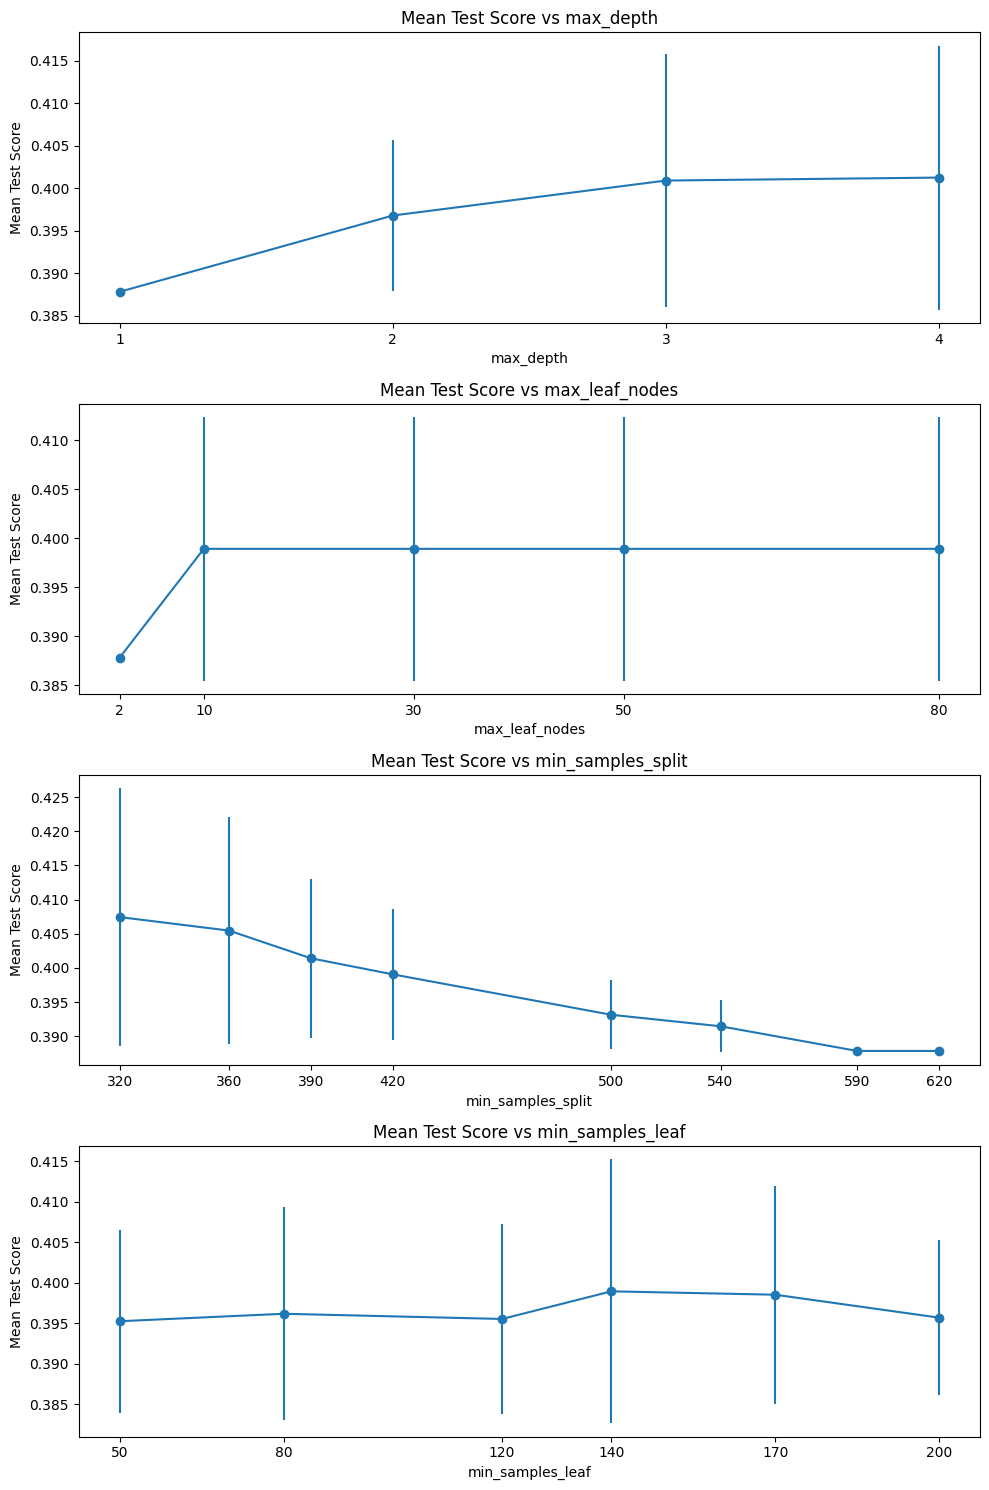

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_cnn['mean_test_score']
params = cv_results_cnn['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


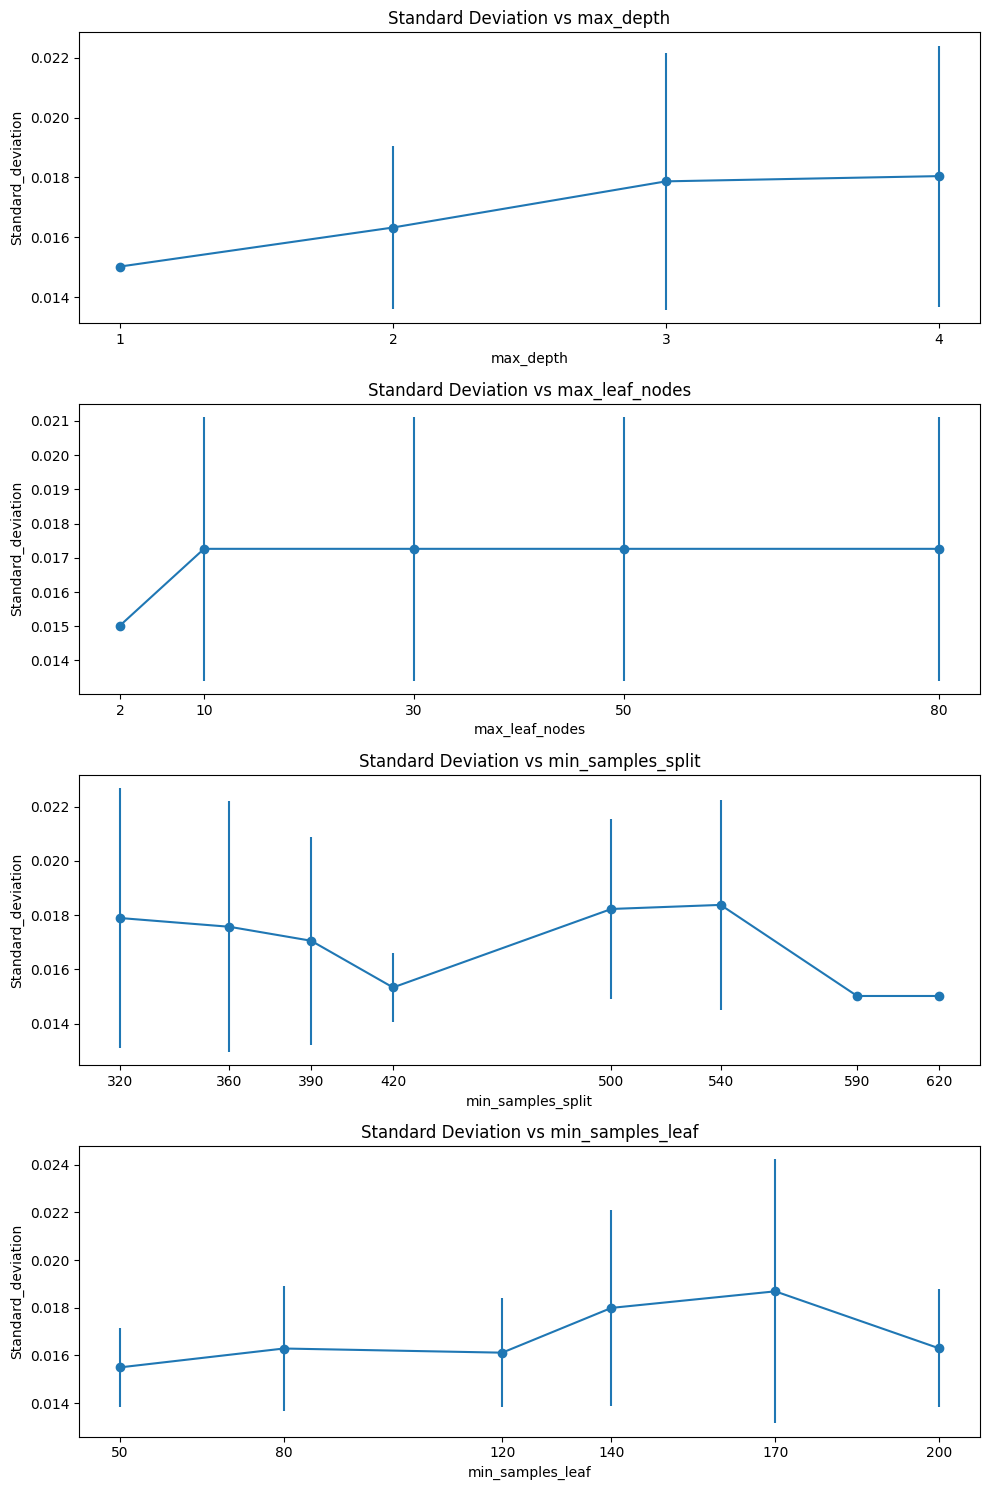

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_cnn['std_test_score']
params = cv_results_cnn['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [16]:
X_cnn_test=X_test.iloc[:,945:2993]
X_test_cnn_arr=X_cnn_test.values
X_test_cnn_scaled = scaler.transform(X_test_cnn_arr)



# y_pred_cnn = best_clf_cnn.predict(X_test_cnn_scaled)

# # Compute accuracy
# accuracy = accuracy_score(y_test, y_pred_cnn)

# print(f"Accuracy on X_test:", accuracy)

Accuracy on X_test_cnn: 0.34935897435897434
Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.00      0.00      0.00        14
     Colin_Powell       0.38      0.30      0.33        47
  Donald_Rumsfeld       0.00      0.00      0.00        31
    George_W_Bush       0.40      0.89      0.55        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.00      0.00      0.00        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.00      0.00      0.00        17
  Serena_Williams       0.00      0.00      0.00         8
       Tony_Blair       0.19      0.52      0.27        25

         accuracy                           0.35       312
        macro avg       0.08      0.14      0.10       312
     weighted avg       0.19      0.35      0.

/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

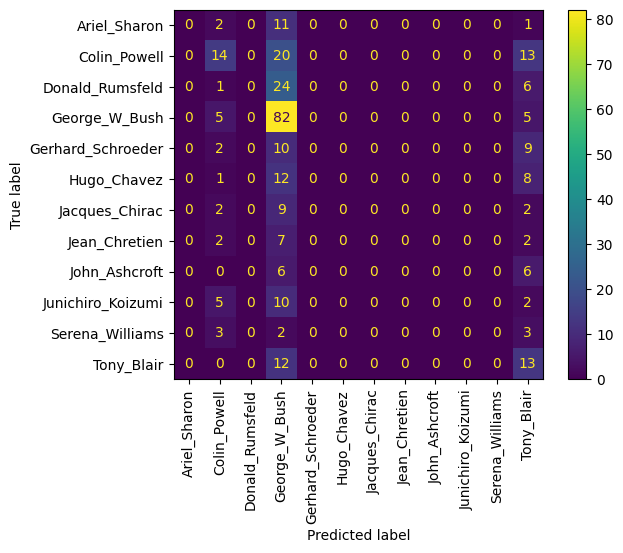

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



model_cnn = joblib.load('saved_models_dt/min_img/50/h_tuned/tuned_dt_cnn_50_gd.joblib')

y_pred_cnn = model_cnn.predict(X_test_cnn_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)

print(f"Accuracy on X_test_cnn:", accuracy)

report = classification_report(y_test, y_pred_cnn)
print("Classification Report:")
print(report)



# Create confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(
    model_cnn, X_test_cnn_scaled, y_test, xticks_rotation="vertical"
)





In [19]:
precision = precision_score(y_test, y_pred_cnn, average='weighted')
recall = recall_score(y_test, y_pred_cnn, average='weighted')
f1 = f1_score(y_test, y_pred_cnn, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Weighted Precision: 0.1898
Weighted Recall: 0.3494
Weighted F1-score: 0.2350


/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>For LBP

In [9]:
X_lbp_train=X_train.iloc[:,2993:3249]
X_train_lbp_arr=X_lbp_train.values
X_train_lbp_scaled = scaler.fit_transform(X_train_lbp_arr)

print(X_train_lbp_scaled.shape)


(1248, 255)


In [ ]:
#getting the max_depth
model(X_train_lbp_scaled,None,'maxdepth')


In [65]:
# Got maximum depth for cnn of the tree as 18
for i in range(1,20,2):
    model(X_train_lbp_scaled,i,f'max_depth_{i}','max_depth')

Accuracy using feature of max_depth_1: 0.312
Depth of the decision tree: 1


Accuracy using feature of max_depth_3: 0.316
Depth of the decision tree: 3
Accuracy using feature of max_depth_5: 0.304
Depth of the decision tree: 5
Accuracy using feature of max_depth_7: 0.28
Depth of the decision tree: 7
Accuracy using feature of max_depth_9: 0.24
Depth of the decision tree: 9
Accuracy using feature of max_depth_11: 0.208
Depth of the decision tree: 11
Accuracy using feature of max_depth_13: 0.216
Depth of the decision tree: 13
Accuracy using feature of max_depth_15: 0.212
Depth of the decision tree: 15
Accuracy using feature of max_depth_17: 0.2
Depth of the decision tree: 17
Accuracy using feature of max_depth_19: 0.216
Depth of the decision tree: 19


In [66]:
for i in range(2,1249,50):
        model(X_train_lbp_scaled,i,f'max_leaf_node {i}','max_leaf_nodes')

Accuracy using feature of max_leaf_node 2: 0.312
Depth of the decision tree: 1
Accuracy using feature of max_leaf_node 52: 0.292
Depth of the decision tree: 13
Accuracy using feature of max_leaf_node 102: 0.236
Depth of the decision tree: 15
Accuracy using feature of max_leaf_node 152: 0.204
Depth of the decision tree: 17
Accuracy using feature of max_leaf_node 202: 0.204
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 252: 0.204
Depth of the decision tree: 18
Accuracy using feature of max_leaf_node 302: 0.204
Depth of the decision tree: 19
Accuracy using feature of max_leaf_node 352: 0.2
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 402: 0.208
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 452: 0.208
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 502: 0.208
Depth of the decision tree: 20
Accuracy using feature of max_leaf_node 552: 0.208
Depth of the decision tree: 20
Accuracy using feature

In [67]:
# for min_sample_split
for i in range(2,1249,50):
    model(X_train_lbp_scaled,i,f'min_samples_split {i}','min_samples_split')

Accuracy using feature of min_samples_split 2: 0.2
Depth of the decision tree: 20
Accuracy using feature of min_samples_split 52: 0.288
Depth of the decision tree: 12
Accuracy using feature of min_samples_split 102: 0.312
Depth of the decision tree: 8
Accuracy using feature of min_samples_split 152: 0.308
Depth of the decision tree: 7
Accuracy using feature of min_samples_split 202: 0.32
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 252: 0.312
Depth of the decision tree: 6
Accuracy using feature of min_samples_split 302: 0.328
Depth of the decision tree: 4
Accuracy using feature of min_samples_split 352: 0.336
Depth of the decision tree: 3
Accuracy using feature of min_samples_split 402: 0.348
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 452: 0.348
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 502: 0.348
Depth of the decision tree: 2
Accuracy using feature of min_samples_split 552: 0.348
Depth of the d

In [68]:
# min_samples_leaf
for i in range(1,1249,50):
    model(X_train_lbp_scaled,i,f'min_samples_leaf{i}','min_samples_leaf')

Accuracy using feature of min_samples_leaf1: 0.2
Depth of the decision tree: 20
Accuracy using feature of min_samples_leaf51: 0.272
Depth of the decision tree: 6
Accuracy using feature of min_samples_leaf101: 0.344
Depth of the decision tree: 4
Accuracy using feature of min_samples_leaf151: 0.324
Depth of the decision tree: 3
Accuracy using feature of min_samples_leaf201: 0.348
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf251: 0.348
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf301: 0.336
Depth of the decision tree: 2
Accuracy using feature of min_samples_leaf351: 0.312
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf401: 0.312
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf451: 0.312
Depth of the decision tree: 1
Accuracy using feature of min_samples_leaf501: 0.312
Depth of the decision tree: 0
Accuracy using feature of min_samples_leaf551: 0.312
Depth of the decision tree: 0
Accuracy

In [69]:
param_grid_lbp={
    'max_depth': [2,4,5],
    'max_leaf_nodes':[30,40,50,70],
    'min_samples_split': [400,470,520,550,580,620],
    'min_samples_leaf': [90,120,140,170,190,230,250]
}

In [70]:
cv_results_lbp,best_clf_lbp=tuning_model(X_train_lbp_scaled,'lbp_50_gd',param_grid_cnn)

Grid Search Results: 
1). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 320}
2). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 360}
3). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 390}
4). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 420}
5). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 500}
6). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_samples_split': 540}
7). Rank_score: 65, Mean accuracy: 0.344, Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 50, 'min_sampl

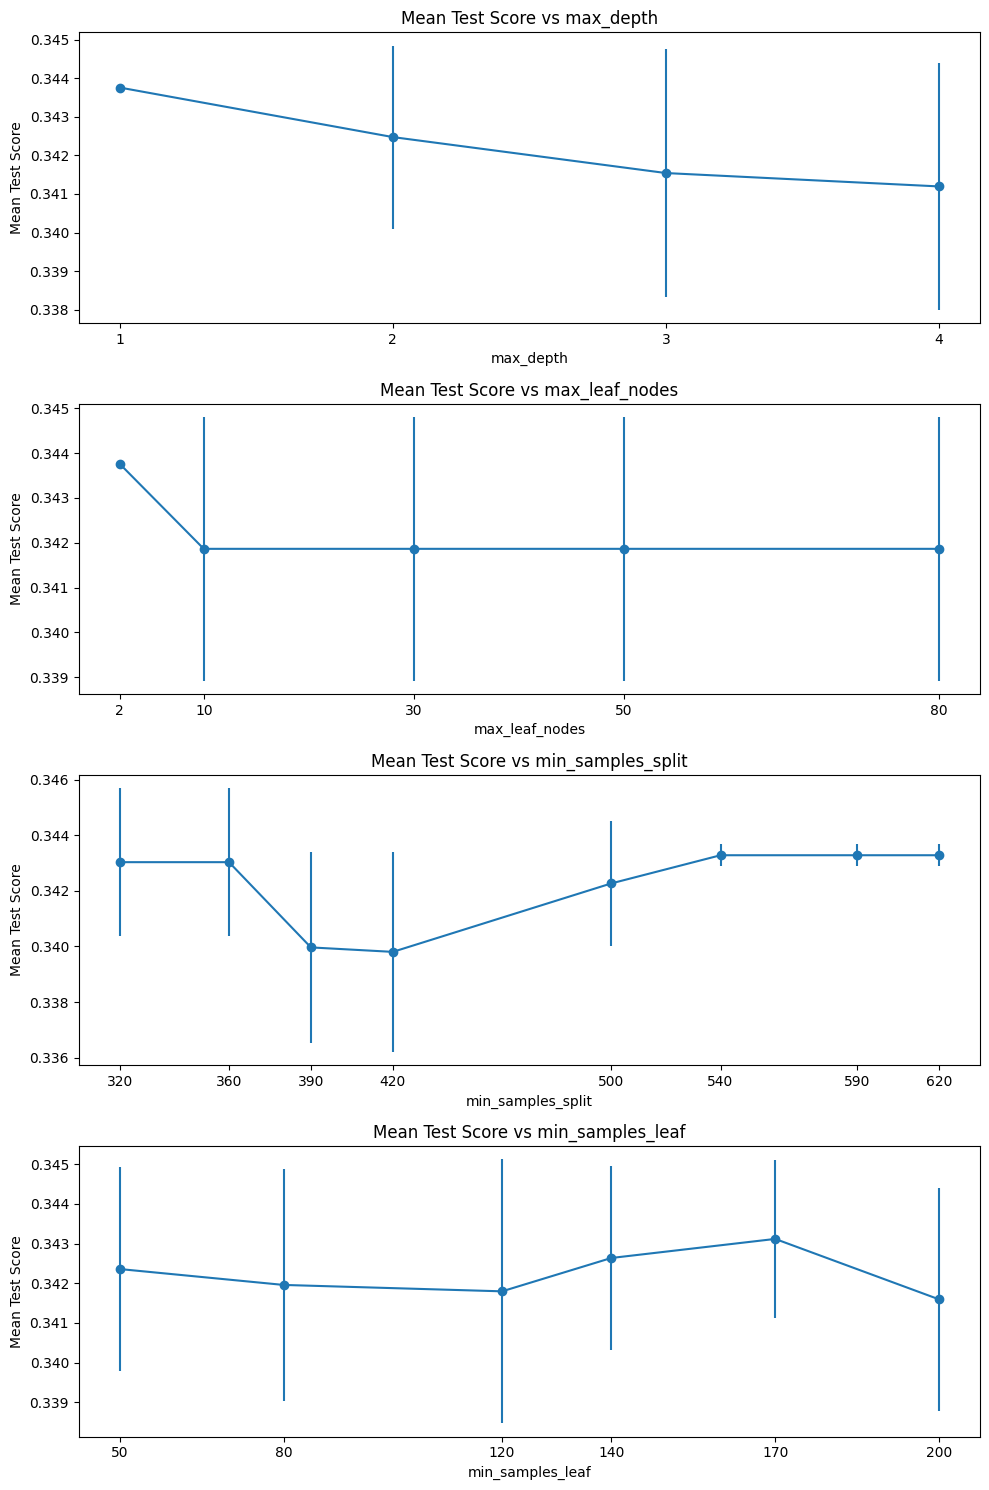

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results
mean_test_scores = cv_results_lbp['mean_test_score']
params = cv_results_lbp['params']

# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [mean_test_scores[k] for k in range(len(mean_test_scores)) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Mean Test Score')
    axs[i].set_title('Mean Test Score vs {}'.format(param_name))

plt.tight_layout()
plt.show()


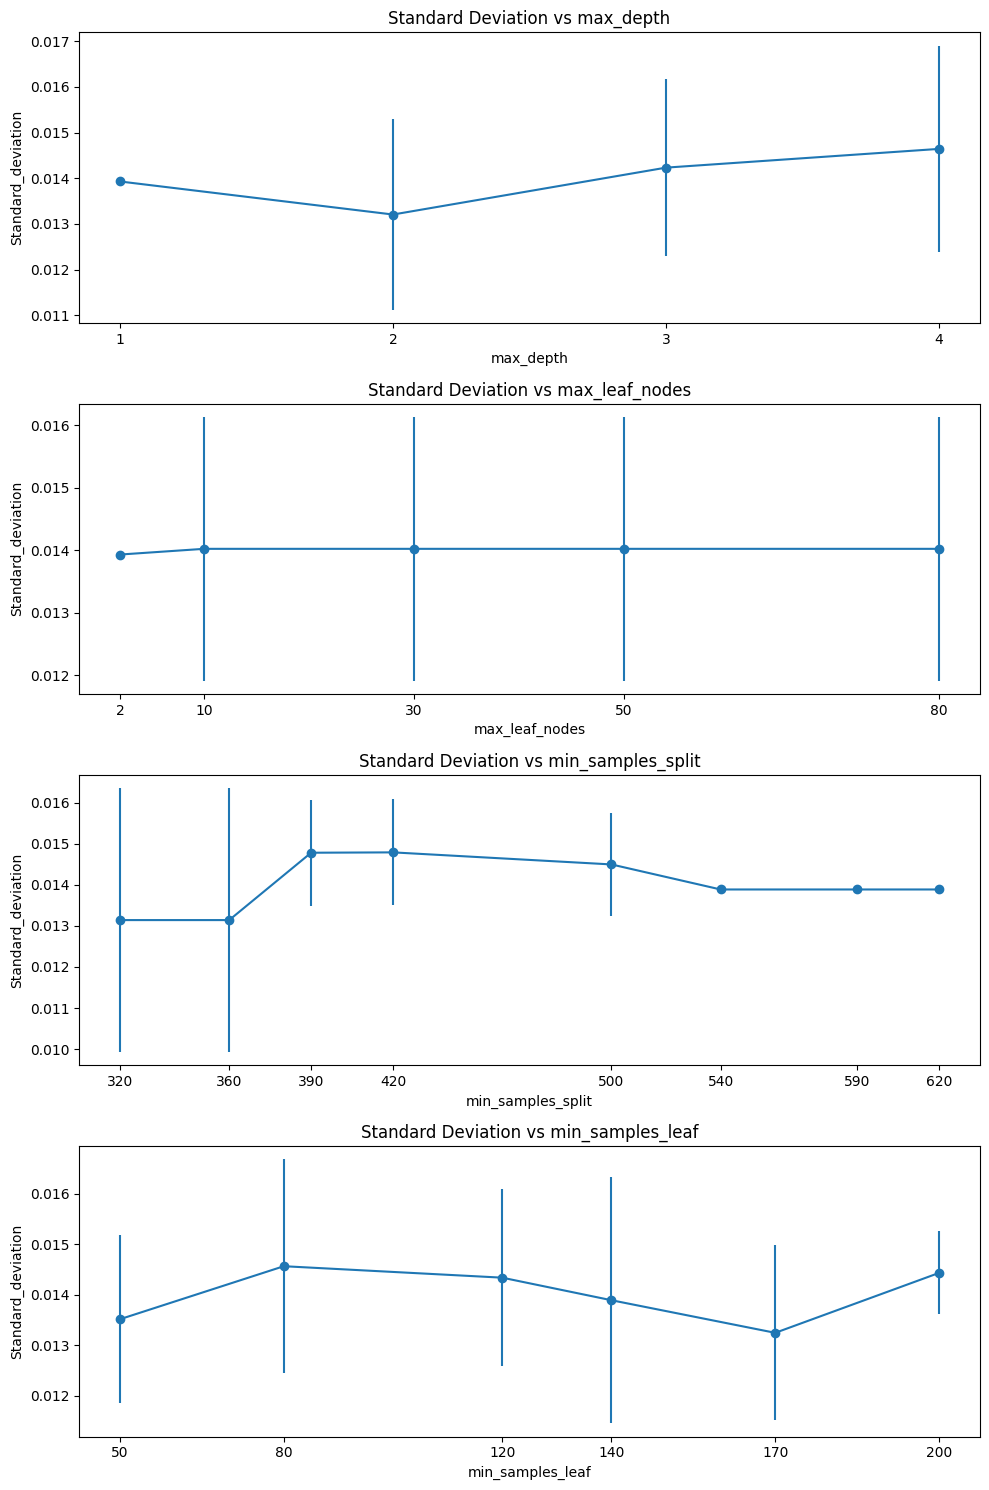

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant data from cv_results

std_test_scores = cv_results_lbp['std_test_score']
params = cv_results_lbp['params']



# Create separate plots for each hyperparameter
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, param_name in enumerate(param_grid.keys()):
    param_values = [params[j][param_name] for j in range(len(params))]
    
    # Convert None values to a placeholder that can be sorted
    param_values = [x if x is not None else -1 for x in param_values]
    
    param_values_unique = np.unique(param_values)
    mean_scores = np.zeros_like(param_values_unique, dtype=float)
    std_scores = np.zeros_like(param_values_unique, dtype=float)
    
    for j, value in enumerate(param_values_unique):
        # Replace placeholder with None for display purposes
        display_values = [value if value != -1 else 'None' for value in param_values_unique]
        scores = [std_test_scores[k] for k in range(len(std_test_scores )) if param_values[k] == value]
        mean_scores[j] = np.mean(scores)
        std_scores[j] = np.std(scores)
    
    axs[i].errorbar(param_values_unique, mean_scores, yerr=std_scores, fmt='-o')
    axs[i].set_xticks(param_values_unique)
    axs[i].set_xticklabels(display_values)  # set_xticklabels instead of set_xticklabels
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Standard_deviation')
    axs[i].set_title('Standard Deviation vs {}'.format(param_name))

plt.tight_layout()
plt.show()


In [11]:
X_lbp_test=X_test.iloc[:,2993:3249]
X_test_lbp_arr=X_lbp_test.values
X_test_lbp_scaled = scaler.transform(X_test_lbp_arr)

In [73]:
# Testing on the test data:


y_pred_lbp = best_clf_lbp.predict(X_test_lbp_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lbp)

print(f"Accuracy on X_test_hog:", accuracy)

Accuracy on X_test_hog: 0.3108974358974359


Accuracy on X_test_hog: 0.3108974358974359
Classification Report:
                   precision    recall  f1-score   support

     Ariel_Sharon       0.00      0.00      0.00        14
     Colin_Powell       0.29      0.26      0.27        47
  Donald_Rumsfeld       0.00      0.00      0.00        31
    George_W_Bush       0.31      0.92      0.47        92
Gerhard_Schroeder       0.00      0.00      0.00        21
      Hugo_Chavez       0.00      0.00      0.00        21
   Jacques_Chirac       0.00      0.00      0.00        13
    Jean_Chretien       0.00      0.00      0.00        11
    John_Ashcroft       0.00      0.00      0.00        12
Junichiro_Koizumi       0.00      0.00      0.00        17
  Serena_Williams       0.00      0.00      0.00         8
       Tony_Blair       0.00      0.00      0.00        25

         accuracy                           0.31       312
        macro avg       0.05      0.10      0.06       312
     weighted avg       0.14      0.31      0.1

/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

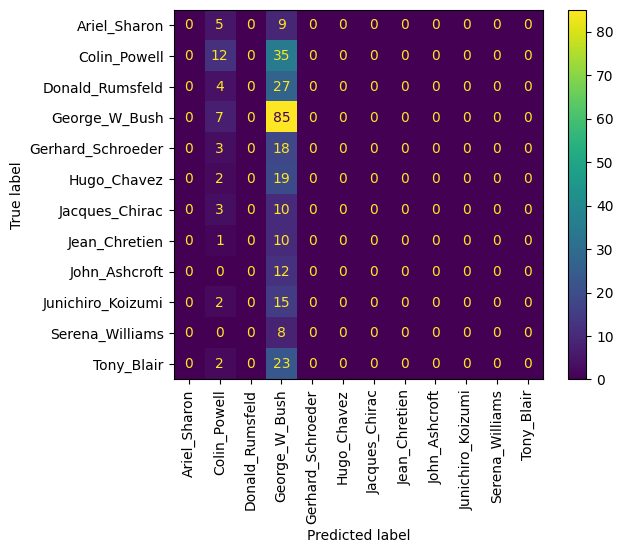

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


model_lbp = joblib.load('saved_models_dt/min_img/50/h_tuned/tuned_dt_lbp_50_gd.joblib')

y_pred_lbp = model_lbp.predict(X_test_lbp_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lbp)

print(f"Accuracy on X_test_hog:", accuracy)

report = classification_report(y_test, y_pred_lbp)
print("Classification Report:")
print(report)



# Create confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(
    model_lbp, X_test_lbp_scaled, y_test, xticks_rotation="vertical"
)





In [13]:
precision = precision_score(y_test, y_pred_lbp, average='weighted')
recall = recall_score(y_test, y_pred_lbp, average='weighted')
f1 = f1_score(y_test, y_pred_lbp, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Weighted Precision: 0.1366
Weighted Recall: 0.3109
Weighted F1-score: 0.1792


/home/adi_techbuddy/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
